In [1]:
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def read(file):
    r=open(file)
    data = [l.split('\t') for l in r]
    df = pd.DataFrame(data[1:-1], columns = data[0]) 
    interactions = df[['preferredName_A', 'preferredName_B', 'score']]
    return interactions

In [3]:
def graph(interactions):
    G=nx.Graph(name='Protein Interaction Graph')
    interactions = np.array(interactions)
    for i in range(len(interactions)):
        interaction = interactions[i]
        a = interaction[0]
        b = interaction[1]
        w = float(interaction[2]) # score as weighted edge where high scores = low weight
        G.add_weighted_edges_from([(a,b,w)])
    return G

In [4]:
def rescale(l,newmin,newmax):
    arr = list(l)
    return [(x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin for x in arr]

In [5]:
def viz(G):
    pos = nx.spring_layout(G)
    graph_colormap = cm.get_cmap('plasma', 12)
    c = rescale([G.degree(v) for v in G],0.0,0.9) 
    c = [graph_colormap(i) for i in c]
    bc = nx.betweenness_centrality(G)
    s =  rescale([v for v in bc.values()],1500,7000)
    ew = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,4)
    ec = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,1)
    ec = [graph_colormap(i) for i in ec]
    pos = nx.spring_layout(G)
    plt.figure(figsize=(15,15),facecolor=[1,1,1,1])
    nx.draw_networkx(G, pos=pos, with_labels=True, node_color=c, node_size=s,edge_color= ec,width=ew,
                     font_color='white',font_weight='bold',font_size='9')
    plt.axis('off')
    plt.show()

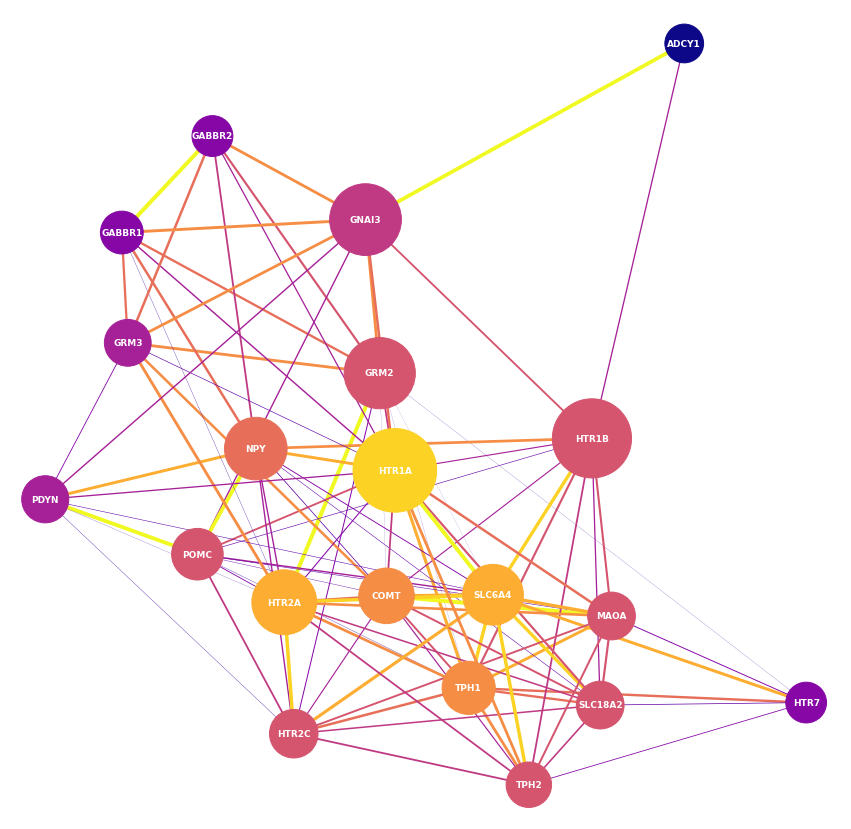

In [6]:
G = graph(read('./humans.txt'))
viz(G)

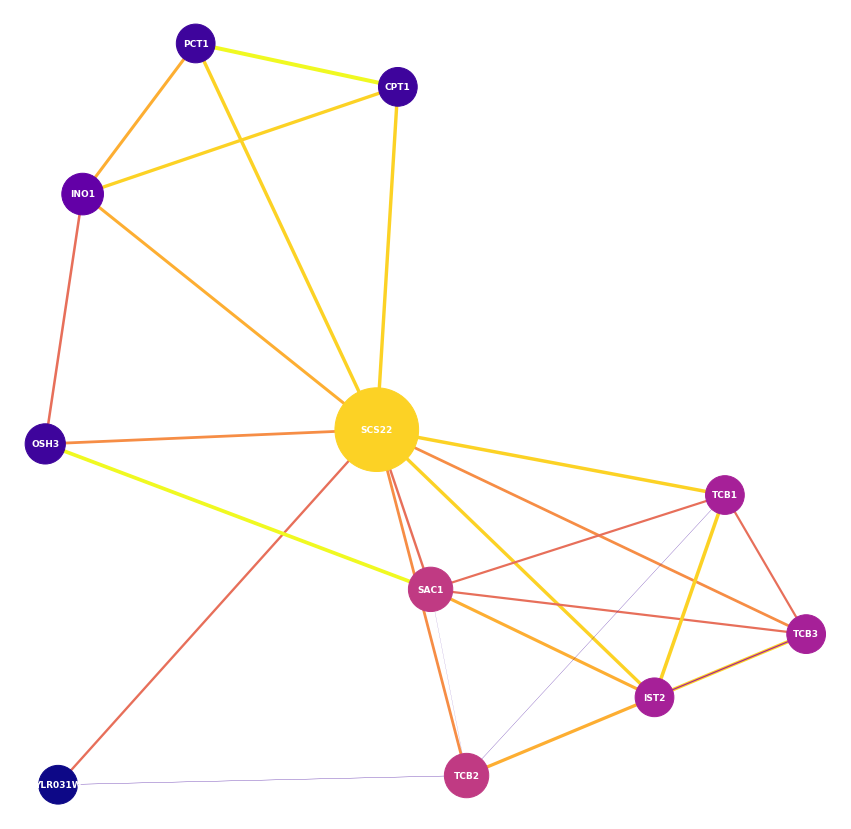

In [7]:
G = graph(read('./yeast'))
viz(G)

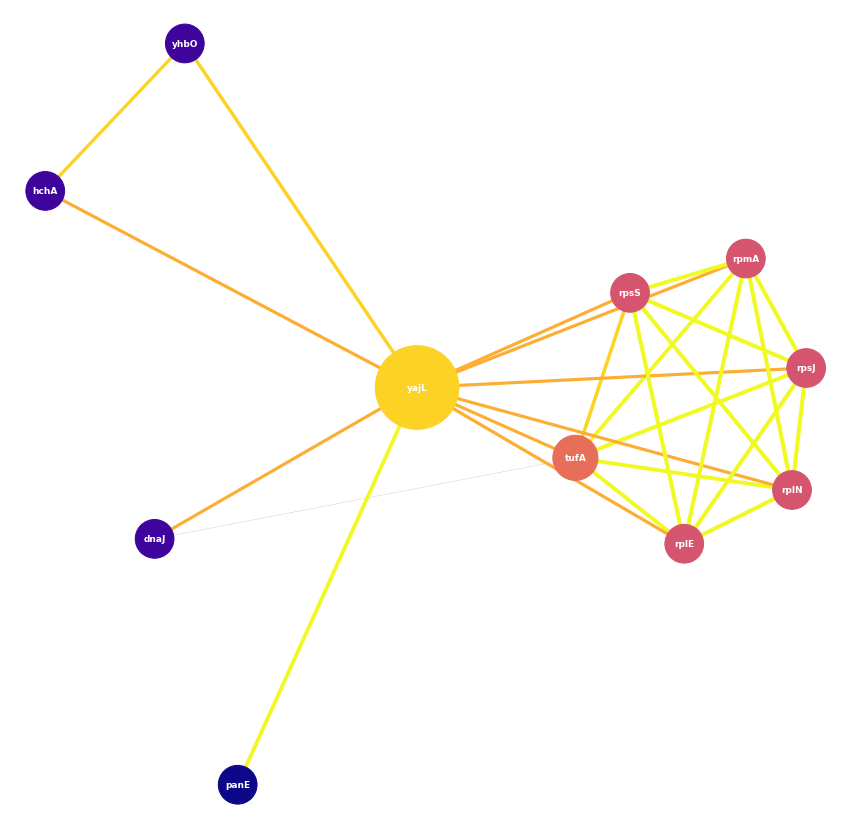

In [8]:
G = graph(read('./ecoli'))
viz(G)